
# **Assignment 1**


## Task 1. Correlation
We will use the data example from the textbook "Statistical Analysis with The General Linear Model" by Miller and Haden (2013), Chapter 11.

As in Miller and Haden, we have five columns:

-Participant (Participant),

-Reading Ability (Abil),

-Intelligence (IQ),

-Number of minutes spent reading at home per week (Home),

-Number of minutes spent watching TV per week (TV).


For the task we will focus on the relationship between Reading Ability and IQ, but for further practice you can look at other relationships on your own.

**Question 1**:

a. Check whether the data is interval, ratio, or ordinal.

b. Check whether there is a data point for each participant on both variables.

c. Check whether the data is normally distributed in both variables.

d. Create a scatter plot with Reading Ability being the x-axis and IQ, being the y-axis.

e. Draw a correlation line on the scatter plot.


**Instructions:**

1. Load the necessary libraries and explain why you need them ("#used for ...").

2. Read the MillerHadenData.csv file into a DataFrame and name it "df_mh".

In [5]:
import pandas as pd # used for data wrangling
import seaborn as sns # used for visualization
import matplotlib  # used for various visualizations
from matplotlib import pyplot as plt # used for plotting information
import pylab # used for importing fuctions from other packages as a way of more convenientienly plotting charts
import pingouin as pg # used for statistical tests and analysis

# Read and name the file for further use 
df_mh = pd.read_csv('MillerHadenData.csv')

In [87]:
# Q1a (code):
# Display first few rows of the dataframe
df_mh.head()

,Participant,Abil,IQ,Home,TV,Rank_Abil
0,1,61,107,144,487,High
1,2,56,109,123,608,High
2,3,45,81,108,640,Low
3,4,66,100,155,493,High
4,5,49,92,103,636,Low


In [88]:
# Check data types and information
# First, I will use .describe() to get an overview of the dataset 
df_mh.describe()

,Participant,Abil,IQ,Home,TV
count,25.000000,25.000000,25.000000,25.000000,25.000000
mean,13.000000,55.120000,100.040000,124.000000,599.920000
std,7.359801,6.084954,9.043782,21.039645,95.056965
min,1.000000,45.000000,81.000000,87.000000,407.000000
25%,7.000000,50.000000,95.000000,108.000000,523.000000
50%,13.000000,54.000000,100.000000,123.000000,636.000000
75%,19.000000,61.000000,104.000000,141.000000,673.000000
max,25.000000,67.000000,118.000000,161.000000,787.000000


In [89]:
# To get a clear overview of the different datatypes in the dataframe, we can use .info()
df_mh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Participant  25 non-null     int64 
 1   Abil         25 non-null     int64 
 2   IQ           25 non-null     int64 
 3   Home         25 non-null     int64 
 4   TV           25 non-null     int64 
 5   Rank_Abil    25 non-null     object
dtypes: int64(5), object(1)
memory usage: 1.3+ KB


 <font color=purple> The information displayed in the different graphs above, reveals that the data (Abil, IQ, Home, TV) we are working with is **ratio data**. The data has a well-defined order and scale and there is a zero point (500 minutes of watching TV is more than 499 minutes of watching TV, while there is also the ability of a participant to have watched 0 minutes which is equal to not having watched TV at all. 

In [98]:
# Q1b (code):
# Check for missing values
# The .info in the cell above already revealed that there are no missing values in any of our dataframe's columns
# We can also use .isnull() combined with .sum() to give us an overview how many times a missing value occurs in each column
# As we are interested in the relationship between Reading Ability and IQ, we can only check these variables for the missing values
missing_values = df_mh[['IQ', 'Abil']].isnull().sum()

# Check whether there is a data point for each participant on both variables

# We can use the earlier defined 'missing_values' to check if there are any missing values 
# This conditional statement checks if there are missing values in either 'IQ' or 'Abil' 
# If this is 'False', it means there are no missing values
# If this is 'True', at least one line has missing values in either 'IQ' or 'Abil'
if not missing_values.any():
    print("There is a data point for each participant on both variables (IQ & Reading Ability)")
else:
    print("There is not a data point for each participant on both variables (IQ & Reading Ability)")
    
# We can also print the assigned variable 'missing_values' to see the divison of missing values
# This will also show us that there are no missing values in both columns, so there will be a data point for each participant

print(missing_values)

There is a data point for each participant on both variables (IQ & Reading Ability)
IQ      0
Abil    0
dtype: int64


,W,pval,normal
IQ,0.963604,0.490811,True
Abil,0.948795,0.235491,True


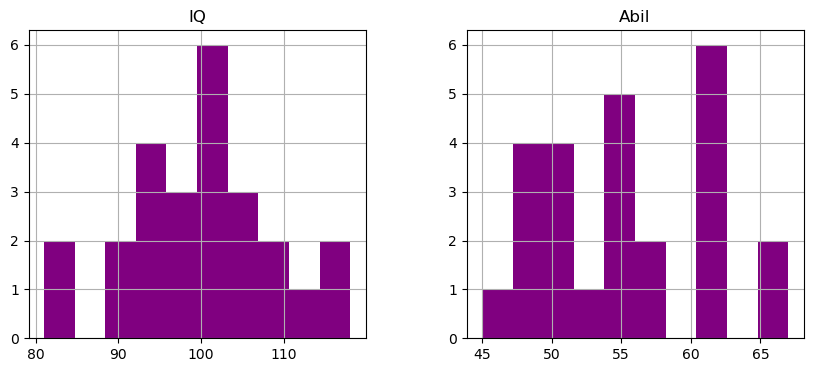

In [91]:
# Q1c (code):
# Check data distribution

# We can visualize the data distribution for to see if 'IQ' and 'Abil' are normally distributed by creating a histogram for both columns
# We can choose the figure size, as well as the color of the bars for readability or consistency
df_mh[['IQ', 'Abil']].hist(figsize=(10, 4), color='purple')

# We can also use Pingouin's normality function to perform a test on 'IQ' and 'Abil' to check if either are normally distributed
# This function performs the Shapiro-Wilk test for normality by default
pg.normality(df_mh[['IQ', 'Abil']])

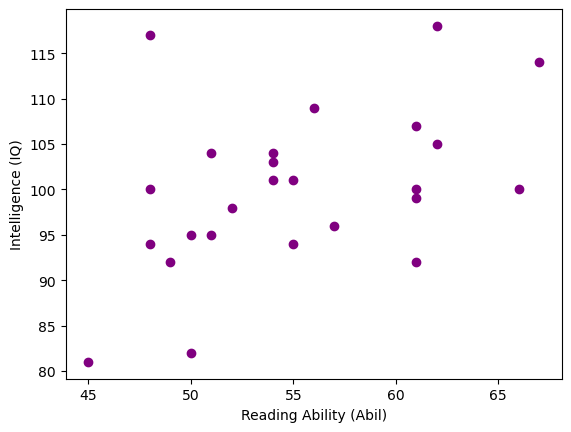

In [92]:
# Q1d (code):

# We will first store the data we need in easy usable variables for creating the scatter plot
# This is a personal preference, we could have also written the necessary information directly into the scatter plot code
IQ = df_mh['IQ']
Abil = df_mh['Abil']

# Scatter plot
plt.scatter(Abil, IQ, c='purple')
plt.xlabel('Reading Ability (Abil)') 
plt.ylabel('Intelligence (IQ)')
plt.show()

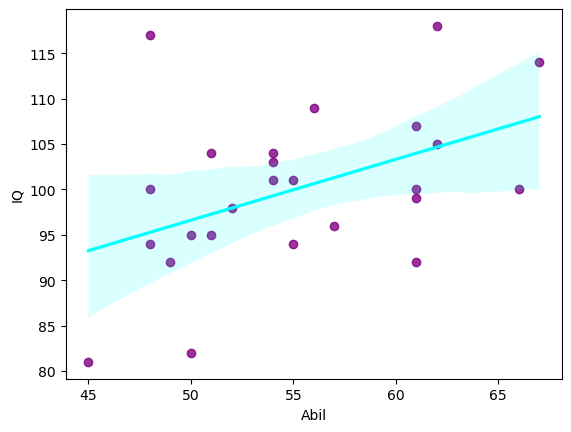

In [93]:
# Q1e (code):
# Draw a correlation line using regplot() from the seaborn package
# I have decided to change the color of the correlation line, so that it differes from the scatter plot for a clearer visualization
plot_corr_sns = sns.regplot(x='Abil', y='IQ', color='cyan', data=df_mh, scatter_kws={'color': 'purple'})

**Question 2**:

a. Which correlation coefficient test can we use, Pearson or Spearman? Briefly explian why based on the results of Question 1.

b. Conduct a correlation coefficient test.

c. Interpret the result (direction and strength of the association between the two varibles)

 <font color=purple> <ins>Q1a:</ins>
    
 <font color=purple> Pearson's coefficient test is a parametric measure in which the data assumption are that the data are normally distributed. 
    
 <font color=purple>Spearman's coefficient test is non-parametric. It's data assumptions are ordinal or continious data. 

 <font color=purple>Following earlier visualizations and tests of the data, we can conclude that our data is normally distributed. The Shapiro-Wilk test returned the normal distribution to be true, whilst the shape of the histograms also implies a normal distribution. Therefore, we pick **Pearson's correlation coefficient test**. 

In [94]:
# Q2b (code):
# Conduct a correlation coefficient test.
# We can conduct this test using Pingouin corr()
pg.corr(Abil, IQ, method='pearson')

,n,r,CI95%,p-val,BF10,power
pearson,25,0.45117,"[0.07, 0.72]",0.023593,2.804,0.640299


 <font color=purple> Q2c:
 

<font color=purple> **Direction:** the direction of the correlation line implies a positive correlation; as one variable increases the other increases as well. Furthermore, the Pearson correlation coefficient test returned 0.45117, a positive value for r (the correlation coefficient), which also implies a positive correlation. 

<font color=purple> **Strength:** the correlation coefficient (r) is always between -1 and 1, where a perfect positive linear relationship is represented by a value of 1, a perfect negative linear relationship by a value of -1, and no linear relationship by a value of 0. In our test, the correlation coefficient is 0.45117, which indicates a moderate  strength of correlation between IQ and Reading Ability. 

## Task 2. Chi-square Test
We will continue to use the data example from Task 1.

We want to explore whether there are significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability). Therefore, we will divide the reading ability of all participants into two groups. The first group is those with low reading ability (Reading Ability at or below the rounded average), and the second group is those with high reading ability (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Abil".


Similarly, the reading time is divided into two different scenarios: the first scenario is infrequent reading (Home at or below the rounded average), and the other is frequent reading (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Home".


Then, construct a Contingency Matrix and perform a Chi-square test.

**Question 3**:

a. Please state the null hypothesis (H0) and alternative hypothesis (H1) for this Chi-square test.

b. Based on the task description, add new columns “Rank_Abil” and "Rank_Home" to the dataframe df_mh.

c. Construct a Contingency Matrix.

d. Perform a Chi-square test.

e. Interpret the results of the Chi-square test (answer in text).

<font color=purple> <ins>Q3a:</ins>
    
<font color=purple>**H1:** The amount of time spent reading at home per week has a positive influence on reading ability. 
    
<font color=purple>**H0:** There is *no* relationship between reading ability and the amount of time spent reading at home per week.

In [104]:
# Q3b (code):
# Import necessary libraries
import pandas as pd  ##used for data analysis and manipulation
from scipy.stats import chi2_contingency ##used for performing the Chi-square test

# Define the rounded average for Reading Ability and Home
rounded_av_abil = round(df_mh['Abil'].mean())
rounded_av_home = round(df_mh['Home'].mean())

# Create the Rank_Abil column
# We will first create an empty list to store our result in 
Rank_Abil = []

# We will use a a for-loop to loop over the values in 'Abil'. 
# If the value is at or below the rounded average of Reading Ability, the empty list will be appended with the 'low ability' score
# Else, a 'high ability' will be appended (scores above the rounded average)
for value in df_mh['Abil']:
    if value <= rounded_av_abil:
        Rank_Abil.append('low ability')
    else:
        Rank_Abil.append('high ability')

# Create the Rank_Home column
# We will, again, first create an empty list to store our result in 
Rank_Home = []

# We will take the same steps here, assigning an 'infrequent reading' to scores at or below the rounded average and frequent to the others (above the rounded average)
for value in df_mh['Home']:
    if value <= rounded_av_home:
        Rank_Home.append('infrequent reading')
    else:
        Rank_Home.append('frequent reading')
        
# Add 'Rank_Abil' and 'Rank_Home' to the dataframe df_mh
df_mh['Rank_Abil'] = Rank_Abil
df_mh['Rank_Home'] = Rank_Home

# Display first few rows of the dataframe to see if the new colums have been added
df_mh.head()

,Participant,Abil,IQ,Home,TV,Rank_Abil,Rank_Home
0,1,61,107,144,487,high ability,frequent reading
1,2,56,109,123,608,high ability,infrequent reading
2,3,45,81,108,640,low ability,infrequent reading
3,4,66,100,155,493,high ability,frequent reading
4,5,49,92,103,636,low ability,infrequent reading


In [118]:
# Q3c (code):
# Construct Contingency Matrix
# We will create a contigency table by using Pandas' cross-tabluate function
# This function counts the occurrences of each combination of values in the 'Rank_Abil' and 'Rank_Home' columns to get our Contingency Matrix
contingency_matrix = pd.crosstab(df_mh['Rank_Abil'], df_mh['Rank_Home'])

# Display the Matrix
contingency_matrix

Rank_Home,frequent reading,infrequent reading
Rank_Abil,,
high ability,8,2
low ability,3,12


In [120]:
# Q3d (code):

# Perform the Chi-square test from the SciPy imported software, fill in the contingency_matrix in the chi2_contingency function
# This tests the independence of variables in a contingency matrix
chi2, p_value, degree_of_freedom, expected_frequencies = chi2_contingency(contingency_matrix)
print(chi2, p_value)
print('These are the expected frequencies')
print(expected_frequencies)

# Translate the resutls of our Chi-square test to evaluate our hypothesis 
if p_value < 0.05:
    print("The observed differences are statiscally significant - H0 is rejected")
else:
    print("The observed differences are not statiscally significant - H1 is rejected")

6.500270562770561 0.010785807794066234
These are the expected frequencies
[[4.4 5.6]
 [6.6 8.4]]
The observed differences are statiscally significant - H0 is rejected


<font color=purple> <ins>Q3e</ins>

<font color=purple> Looking at the Chi-square test performed in the cell above, we can conclude that **our null hypothesis (H0) can be rejected**. We can conclude this because the p-value of 0.010785807794066234 is lower than 0.05.

<font color=purple> This means that, according to our test, **there is a statistical significance in the relationship between reading ability and the amount of time spent reading at home per week**.

## Task 3. Two-sample t-test
As we discussed on Week 3, Two-sample designs are very useful when we want to know whether there is a difference between groups on a particular variable.

In this assignment, you will be guided to replicate the Experiment 4 (p. 887-888) from the paper below, focusing on understanding the data through descriptive statistics, visualizing distributions, testing assumptions (normality and variance homogeneity), and finally performing the independent t-test.

Schroeder, J. and Epley, N. (2015). The sound of intellect: Speech reveals a thoughtful mind, increasing a job candidate's appeal. Psychological Science, 26, 277--891.


As we explained during Week 3 lecture, there are different types of two-sample designs depending on whether or not the two groups are independent (e.g., different participants in different conditions) or not (e.g., same participants in different conditions). In this course we focus on independent samples, which typically means that the observations in the two groups are unrelated - usually meaning different people. But in real practice you will need to go through similar procedures to determine which is the proper statistical test to use.




### Background of data: Speech as indicator of intellect
To recap on Experiment 4, 39 professional recruiters from Fortune 500 companies evaluated job pitches of M.B.A. candidates (Masters in Business Administration) from the University of Chicago Booth School of Business. The methods and results appear on pages 887--889 of the article if you want to look at them specifically for more details.

### Step 1: Analyze the demographics of evaluators from the provided dataset

**Instructions:**

1. Load the necessary libraries (pandas, scipy, numpy, matplotlib.pyplot, seaborn) and explain why you need them ("#used for ...").

2. Read the evaluators.csv file into a DataFrame.

3. Calculate the mean and standard deviation of the age of the evaluators, handling missing values appropriately.

4. Count how many male and female evaluators were in the study.

**Question 4:**

a. What was the mean age of the evaluators?
What was the standard deviation of the age of the evaluators?

b. How many participants were female and how many participants were male?


In [129]:
import pandas as pd # used for data analysis and manipulation
from scipy import stats # used for statistical tests
import numpy as np # used for numerical and mathematical operations
import matplotlib.pyplot as plt ## used for plotting information
import seaborn as sns # used for visualization

# Load the data
df_evaluators = pd.read_csv('evaluators.csv')
df_evaluators.head()

,eval_id,condition,age,sex
0,1,listened,29.0,2.0
1,2,listened,27.0,2.0
2,3,listened,27.0,2.0
3,4,read,40.0,2.0
4,5,read,32.0,2.0


In [126]:
# Q4a (code):
# Calculate mean and standard deviation for age
# Using .describe, we get an overview of our data which includes both the mean and the standard deviation for our columns
df_evaluators.describe()

,eval_id,age,sex
count,39.000000,34.000000,34.000000
mean,20.000000,30.852941,1.882353
std,11.401754,6.238358,0.327035
min,1.000000,23.000000,1.000000
25%,10.500000,27.000000,2.000000
50%,20.000000,29.000000,2.000000
75%,29.500000,32.750000,2.000000
max,39.000000,48.000000,2.000000


<font color=purple> The **mean** for age is 30.852941 

<font color=purple> The **standard deviation** for age is 6.238358	

In [148]:
# Q4b (code)
# Count male and female evaluators using the function value_counts for the column 'sex'
# In the 'sex' column: 1 represents males and 2 represents females
sex_counts = df_evaluators['sex'].value_counts()

# Display the information in a more clear manner
print ('Male evaluators:', sex_counts[1])
print('Female evaluators:', sex_counts[2])

Male evaluators: 4
Female evaluators: 30


<font color=purple> By looking at the total of both male and female evaluators together, we have the same count of 34 as displayed in the earlier 'df_evaluators.describe()' result for 'sex'. This counting thus looks to be correct! 

### Step 2: Calculate overall intellect ratings from evaluators and prepare a combined dataset for analysis

We are now going to calculate an overall intellect rating given by each evaluator. To break that down a bit, we are going to calculate how intellectual the evaluators (the raters) thought candidates were overall, depending on whether the evaluators read or listened to the candidates' resume pitches. This is calculated by averaging the ratings of competent, thoughtful and intelligent for each evaluator held within ratings.csv.

Note: We are not looking at ratings to individual candidates; we are looking at overall ratings for each evaluator. This is a bit confusing but makes sense if you stop to think about it a little. You can think about it in terms of "do raters rate differently depending on whether they read or listen to a resume pitch".
We will then combine the overall intellect rating with the overall impression ratings and overall hire ratings for each evaluator, all ready found in ratings.csv. In the end we will have a new new dataframe named "ratings2" - which has the below structure:

**eval_id** shows the evaluator ID. Each evaluator has a different ID. So all the 1's are the same evaluator.

**Category** shows the scale that they were rating on - intellect, hire, impression

**Rating** shows the overall rating given by that evaluator on a given scale.

**condition** shows whether that evaluator listened to (e.g., evaluators 1, 2 and 3), or read (e.g., evaluator 4) the resume.


**Instructions:**

1. Load the ratings.csv file.

2. Filter and calculate the mean intellect rating for each evaluator.

3. Combine this with overall impression and hire ratings to create a new DataFrame named "rating2".

4. Merge this DataFrame with the evaluator demographics.

**Question 5**:

Print the head of "rating2".


In [149]:
# Load ratings data
df_ratings = pd.read_csv('ratings.csv')
df_ratings.head()

,eval_id,Category,Rating
0,1,competent,6.0
1,1,thoughtful,6.0
2,1,intelligent,6.0
3,1,impression,7.0
4,1,hire,6.0


In [183]:
# Q5 (code):
# Filter the ratings DataFrame to include only 'thoughtful', 'competent', and 'intelligent' categories
df_ratings_filtered = df_ratings[df_ratings['Category'].isin(['thoughtful', 'competent', 'intelligent'])]

# Calculate the mean intellect rating for each evaluator
# Group by 'eval_id' and calculate mean, then reset the index to convert groupby object back to DataFrame
mean_intellect_rating = df_ratings_filtered.groupby('eval_id')['Rating'].mean().reset_index()

# Add a 'Category' column with the value 'intellect' for these rows
mean_intellect_rating['Category'] = 'intellect'

# Create a DataFrame for 'impression' and 'hire' ratings
df_ratings_other = df_ratings[df_ratings['Category'].isin(['impression', 'hire'])]

# Combine the DataFrames to create 'ratings2'
# Concatenate the 'mean_intellect_rating' DataFrame with the 'df_ratings_other' DataFrame
ratings2 = pd.concat([mean_intellect_rating, df_ratings_other])

# Join 'ratings2' with the 'df_evaluators' DataFrame to add the 'condition' column
ratings2 = pd.merge(ratings2, df_evaluators[['eval_id', 'condition']], on='eval_id')

# Select only the necessary columns as per the structure required
ratings2 = ratings2[['eval_id', 'Category', 'Rating', 'condition']]

# Arrange by 'eval_id' and 'Category'
ratings2 = ratings2.sort_values(by = ['eval_id', 'Category'])

# Display the first few rows of the final 'ratings2' DataFrame to verify
ratings2.head()

,eval_id,Category,Rating,condition
2,1,hire,6.000000,listened
1,1,impression,7.000000,listened
0,1,intellect,6.000000,listened
5,2,hire,4.000000,listened
4,2,impression,4.666667,listened


### Step 3: Perform descriptive and inferential statistical analyses, including testing assumptions and conducting independent t-tests.

We are going to run the t-tests for Intellect, Hire and Impression; each time comparing evaluators overall ratings for the listened group versus overall ratings for the read group to see if there was a significant difference between the two conditions: i.e., did the evaluators who listened to pitches give a significant higher or lower rating than evaluators that read pitches?

**Question 6**:

a. In terms of hypotheses, how can we phrase the hypothesis?

b. Which t-test should we choose, one-tail or two-tail? And explian why.

c. What are the independent variable and the dependent variable here?


<font color=purple>  <ins> Q6a:</ins>

<font color=purple>**Null Hypothesis:** There is **no** significant difference between the overall ratings of the *listened* group and the overall ratings of the *read* group for intellect, hire, and impression.  
 
<font color=purple>**Alternative Hypothesis:** There is **a** significant difference between the overall ratings of the *listened* group and the overall ratings of the *read* group for intellect, hire, and impression. 

<font color=purple> <ins>Q6b: </ins>

<font color=purple> As our hypothesis is non-directional (we want to see if 'there is a significant difference', but are not interested in the direction of this difference), our t-test needs to be **two-tailed**. By doing a two-tail test, we can check both directions (either higher or lower scores for the overall ratings of the groups)

<font color=purple> <ins> Q6c:</ins>

<font color=purple> **The independent variables** consist of the variables that are used to categorize our independent groups. In this study, this consists of the evaluators who listened to the pitches and the evaluators who read the pitches. 

<font color=purple> **The dependent variable** are the variables that are expected to influenced by the independent variable. In this case, these are the ratings based on the categories intellect, hire, and impression. 


To clarify, we are going to run three between-subjects t-tests in total; one for intellect ratings; one for hire ratings; one for impression ratings.

**Instructions:**

1. Descriptive analysis of the ratings.

2. Test for normal distribution (Shapiro-Wilk test) and homogeneity of variances (Levene's test) for the intellect, impression, and hire ratings.

3. Conduct independent t-tests comparing intellect, impression, and hire ratings between conditions (listened vs. read).

Hints: three T-tests need to be performed.

**Question 7**:

a: Print the test results.

b: Interpret the results of the above descriptive statistics, Shapiro-Wilk test, Levene's test, and independent t-tests. Explian why we use these tests and how we made our decisions based on the test result.

In [206]:
##Q7a (code):
from scipy.stats import shapiro, levene, ttest_ind # used for statistical tests: normal distribution (Shapiro-Wilk test), homogeneity of variances (Levene's test), and T-tests

# Descriptive analysis of the ratings
ratings_desc = ratings2.groupby('Category')['Rating'].describe()

ratings_desc

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
hire,39.0,3.871795,2.330343,0.000000,2.000000,4.000000,5.0,8.000000
impression,39.0,5.094017,2.254234,0.333333,3.666667,5.333333,7.0,8.666667
intellect,39.0,4.717949,2.000787,0.666667,3.500000,5.000000,6.0,9.000000


<font color=purple> <ins> Q7b:</ins>

<font color=purple> We can use these descriptive statistics to get a quick overview of the important statistical information, such as the mean and standard deviation. The 25%, 50% and 75% category will also give us an initial idea of the general distribution of the data in our collection. The 50% category is also known as the median. Furthermore, the minimum and maximum are also given.
 
<font color=purple> **The 'hire' category** ratings are fairly distributed. We can see this from its mean of 3.87 and standard deviation of 2.33. Furthermore, the majority of ratings fall between 2.00 and 5.00.
    
<font color=purple> **The 'impression' category** ratings have a higher mean of 5.09 and a standard deviation of 2.25. The ratings are more closely distributed between 3.67 and 7.00.

<font color=purple> **The 'intellect' category** ratings show a standard deviation of 2.00 and a mean of 4.72. The majority of ratings fall between 3.50 and 6.00.

In [258]:
##Q7a (code):

# Test for normal distribution (Shapiro-Wilk test)

# Create three separate DataFrames, each containing rows specific to one of the categories: 'hire', 'intellect', and 'impression'. 
ratings_hire = ratings2[ratings2['Category'] == 'hire']
ratings_impression = ratings2[ratings2['Category'] == 'impression']
ratings_intellect = ratings2[ratings2['Category'] == 'intellect']

# Shapiro-Wilk test 'hire' using stats.shapiro (returning the shapiro and the p-value score)
score_shapiro_hire, p_val_shapiro_hire = stats.shapiro(ratings_hire['Rating'])

# Shapiro-Wilk test 'impression' using stats.shapiro (returning the shapiro and the p-value score)
score_shapiro_impression, p_val_shapiro_impression = stats.shapiro(ratings_impression['Rating'])

# Shapiro-Wilk test 'intellect' using stats.shapiro (returning the shapiro and the p-value score)
score_shapiro_intellect, p_val_shapiro_intellect = stats.shapiro(ratings_intellect['Rating'])

# Store the seperate scores to the variable 'shapiro_results'
shapiro_results = 'Hire:', score_shapiro_hire, p_val_shapiro_hire, 'Impression:',score_shapiro_impression, p_val_shapiro_impression,'Intellect:', score_shapiro_intellect, p_val_shapiro_intellect

shapiro_results

('Hire:',
 0.9427909851074219,
 0.04710369557142258,
 'Impression:',
 0.9595587849617004,
 0.17238670587539673,
 'Intellect:',
 0.9747602939605713,
 0.5182666182518005)

<font color=purple> <ins> Q7b:</ins>
    
<font color=purple>We do these tests to see how our data are distributed. These initial tests will influence what kind of further testing we will need to do to ultimatelly analyze our data and conclude if our hypothesis can be verified or rejected.

<font color=purple>The Shapiro-Wilk test returns the Shapiro-Wilk score and the p-value.

<font color=purple>The results from the Shapiro-Wilk test show if our data are normally distributed through this p-<font color=purple>value it returns. If the p-value is less than 0.05, we can say that the data tested are not normally distributed. 

<font color=purple>For the Shapiro-Wilk tests performed above we can conclude the following:
    
<font color=purple> **Hire:** the score 0.04710369557142258 is lower than 0.05. Therefore, we can conclude that 'hire' ratings are not normally distributed. 
    
<font color=purple>**Impression:** the score 0.17238670587539673 is larger than 0.05. Therefore, we can conclude that the 'impression' ratings are normally distributed.
    
<font color=purple>**Intellect:** the score 0.5182666182518005 is much larger than 0.05. Therefore, we can conclude that the 'impression' ratings are normally distributed.

In [260]:
##Q7a (code):
# Test for homogeneity of variances (Levene's test)

# Extract each category and select the evaluators overall ratings for both the listened group versus overall ratings for the read group 
# This will make the data suitable for the Levene's test
# Using & we will combine both conditions we are filtering on (extracting he 'Rating' column for evaluators in the correct category for both readers and listeners)

# 'hire'
ratings_hire_read = ratings2[(ratings2['Category'] == 'hire') & (ratings2['condition'] == 'read')]['Rating']
ratings_hire_listen = ratings2[(ratings2['Category'] == 'hire') & (ratings2['condition'] == 'listened')]['Rating']

# 'impression'
ratings_impression_read = ratings2[(ratings2['Category'] == 'impression') & (ratings2['condition'] == 'read')]['Rating']
ratings_impression_listen = ratings2[(ratings2['Category'] == 'impression') & (ratings2['condition'] == 'listened')]['Rating']

# 'intellect'
ratings_intellect_read = ratings2[(ratings2['Category'] == 'intellect') & (ratings2['condition'] == 'read')]['Rating']
ratings_intellect_listen = ratings2[(ratings2['Category'] == 'intellect') & (ratings2['condition'] == 'listened')]['Rating']

In [274]:
# Levene's test 'hire' using stats.levene
score_levene_hire, p_val_levene_hire = stats.levene(ratings_hire_read, ratings_hire_listen)

# Levene's test 'impression' using stats.levene
score_levene_impression, p_val_levene_impression = stats.levene(ratings_impression_read, ratings_impression_listen)

# Levene's test 'intellect' using stats.levene
score_levene_intellect, p_val_levene_intellect = stats.levene(ratings_intellect_read, ratings_intellect_listen)

# Store the seperate scores to the variable 'levene_results'
levene_results = 'Hire:', score_levene_hire, p_val_levene_hire, 'Impression:', score_levene_impression, p_val_levene_impression,'Intellect:', score_levene_intellect, p_val_levene_intellect

levene_results

('Hire:',
 0.10663746145199855,
 0.7458453933447955,
 'Impression:',
 0.39045326236607025,
 0.5358960150374064,
 'Intellect:',
 0.8980185752566812,
 0.34946205893248505)

<font color=purple> <ins> Q7b:</ins>

<font color=purple>Levene's test returns the Levene Statistic and the p-value 

<font color=purple>The Levene's test is used to assess the homogeneity of variances across different groups. If the p-value from Levene's test is below 0.05, it suggests that the observed differences in our data are probably not random. You could then conclude that there is a difference between the groups.

<font color=purple> **Hire:** the score 0.7458453933447955 is much higher than 0.05. This suggests that there is no significant difference in variances between the two groups performing the 'hire' ratings. 
    
<font color=purple>**Impression:** the score 0.5358960150374064 is larger than 0.05. This suggests that there is no significant difference in variances between the two groups performing the 'impression' ratings. 
    
<font color=purple>**Intellect:** the score 0.34946205893248505 is again larger than 0.05. This again suggests that there is no significant difference in variances between the two groups performing the 'intellect' ratings. 


<font color=purple>There is thus no significant evidence to suggest that the variances are different between the groups in any of the three categories. 

In [273]:
##Q7a (code):
from scipy.stats import mannwhitneyu # used for the performing the non-parametric Mann-Whitney U test

# Independent t-tests

# 'Hire' is not normally distributed, we can therefore use a non-parametric test. 
# In this case, we use the Mann-Whitney U Test

# Mann-Whitney U test for 'hire'
u_score_hire, p_val_hire = mannwhitneyu(ratings_hire_listen, ratings_hire_read, alternative='two-sided')

# T-test for 'impression'    
ttest_score_impression, p_val_impression = ttest_ind(ratings_impression_listen, ratings_impression_read)

# T-test for 'intellect'    
ttest_score_intellect, p_val_intellect = ttest_ind(ratings_intellect_listen, ratings_intellect_read)

# Store the seperate scores to the variable 'ttest_results'
ttest_results = 'Hire:', u_score_hire, p_val_hire , 'Impression:', ttest_score_impression, p_val_impression, 'Intellect:', ttest_score_intellect, p_val_intellect

ttest_results

('Hire:',
 275.5,
 0.014413410635040338,
 'Impression:',
 2.850766179025179,
 0.007091060616710596,
 'Intellect:',
 3.5259329220482414,
 0.0011444414996286821)

<font color=purple> <ins> Q7b:</ins>

<font color=purple> The t-test returns the t statistic and the p-value, the Mann-Whitney U test returns the u statistics and the p-value.
    
<font color=purple> These tests performed in the cell above (The Independent t-test and Mann-Whitney U test) are both statistical tests which we can use to compare different groups and analyze whether there is a significance difference between them. We move on to this step to ultimately test the hypothesis we set out earlier.
    
<font color=purple> The t-test is used when the data is assumed to be normally distributed and aims to compare two sample means from unrelated groups. The Mann-Whitney U test is a non-parametrictest that does not assume a normal distribution of the data.

<font color=purple> **Hire:** We have used the Mann-Whitney U test for 'hire'. This returned a p-value of 0.014413410635040338 which is lower than 0.05. Therefore, we can assume that there is a difference between the two groups in the 'hire' category. 
    
<font color=purple>**Impression:** We have used the independent t-test for 'impression'. This returned a p-value of 0.007091060616710596 which is lower than 0.05. herefore, we can assume that there is a difference between the two groups in the 'impression' category. 
   
    
<font color=purple>**Intellect:** We have used the independent t-test for 'impression'. This returned a p-value of 0.0011444414996286821 which is lower than 0.05. herefore, we can assume that there is a difference between the two groups in the 'impression' category. 


<font color=purple>**To conclude**, for all three categories the results suggest significant differences between the groups based on the tests. This also means that for all three categories, we can reject the Null Hypothesis ("there is no significant difference between the overall ratings of the *listened* group and the overall ratings of the *read* group for intellect, hire, and impression"), as the results of the test suggest there does seem to be a significant difference between the overall ratings of the *listened* group and the overall ratings of the *read* group for intellect, hire, and impression. 